# 릿지(ridge) and 라쏘(lasso) 학습

### 데이터 로딩

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### 전처리

In [3]:
from sklearn.model_selection import train_test_split
train_length, test_length, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
train_length = train_length.reshape(-1,1)
test_length = test_length.reshape(-1,1)

### 선형회귀

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_length, train_target)

LinearRegression()

In [6]:
print(lr.predict([[50]]))
print(lr.score(train_length, train_target))
print(lr.score(test_length, test_target))

[1241.83860323]
0.9398463339976041
0.824750312331356


### 다항회귀

In [7]:
train_poly = np.column_stack((train_length **2, train_length))
test_poly = np.column_stack((test_length **2, test_length))

In [8]:
lr2 = LinearRegression()
lr2.fit(train_poly, train_target)

LinearRegression()

In [9]:
print(lr2.coef_, lr2.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


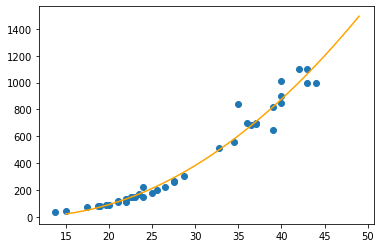

In [10]:
import matplotlib.pyplot as plt
point = np.arange(15,50)
plt.scatter(train_length, train_target)
plt.plot(point, lr2.coef_[0]*point**2 + lr2.coef_[1]*point + lr2.intercept_, c = 'orange')
plt.show()

In [11]:
print(lr2.score(train_poly, train_target))
print(lr2.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


### 다중 회귀

In [12]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [13]:
from sklearn.model_selection import train_test_split
train_full, test_full, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_full)
train_poly = poly.transform(train_full)
print(train_poly.shape)

(42, 9)


In [15]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [16]:
test_poly = poly.transform(test_full)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594199


In [18]:
# degree 매개변수 : 필요한 고차항의 최대 차수 지정
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_full)
train_poly = poly.transform(train_full)
test_poly = poly.transform(test_full)
print(train_poly.shape)
print(poly.get_feature_names_out())

(42, 55)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2' 'x0^3'
 'x0^2 x1' 'x0^2 x2' 'x0 x1^2' 'x0 x1 x2' 'x0 x2^2' 'x1^3' 'x1^2 x2'
 'x1 x2^2' 'x2^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^2 x1^2' 'x0^2 x1 x2'
 'x0^2 x2^2' 'x0 x1^3' 'x0 x1^2 x2' 'x0 x1 x2^2' 'x0 x2^3' 'x1^4'
 'x1^3 x2' 'x1^2 x2^2' 'x1 x2^3' 'x2^4' 'x0^5' 'x0^4 x1' 'x0^4 x2'
 'x0^3 x1^2' 'x0^3 x1 x2' 'x0^3 x2^2' 'x0^2 x1^3' 'x0^2 x1^2 x2'
 'x0^2 x1 x2^2' 'x0^2 x2^3' 'x0 x1^4' 'x0 x1^3 x2' 'x0 x1^2 x2^2'
 'x0 x1 x2^3' 'x0 x2^4' 'x1^5' 'x1^4 x2' 'x1^3 x2^2' 'x1^2 x2^3' 'x1 x2^4'
 'x2^5']


In [19]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999997439
-144.40564427629454


#### -> 지나치게 과적합되었으므로 __규제__ 가 필요

### 규제 Regularization

#### 표준화 작업

In [20]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(train_poly)
train_scaled = st.transform(train_poly)
test_scaled = st.transform(test_poly)

### 릿지 Ridge
- 하이퍼파라미터 alpha 값이 클수록 규제강도가 세진다 -> 과소적합되도록 유도

In [21]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


0.9896101671037343
0.9790693977615391


In [22]:
import matplotlib.pyplot as plt
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)

    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

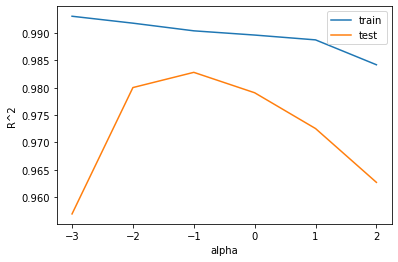

In [23]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train','test'])
plt.show()

In [24]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


In [25]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))


0.989789897208096
0.9800593698421883


In [26]:
from sklearn.linear_model import ElasticNet
el = ElasticNet()
el.fit(train_scaled, train_target)
print(el.score(train_scaled, train_target))
print(el.score(test_scaled, test_target))

0.9878525957972832
0.9687606937605281


In [27]:
import matplotlib.pyplot as plt
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled, train_target)

    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

c:\Users\wng37\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\wng37\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\wng37\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

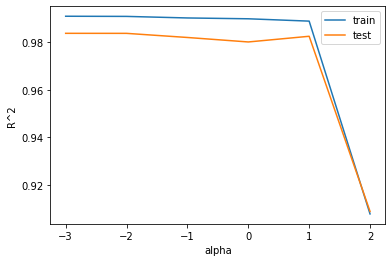

In [28]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train','test'])
plt.show()

In [29]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


#### lasso의 계수를 살펴보면 0이 아닌 계수가 전체 55개중에 15개 밖에 없음을 알 수 있다

In [30]:
print(np.sum(lasso.coef_ != 0))   

15
